In [1]:
# ARIMA实践

In [19]:
from matplotlib.dates import DateFormatter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df1 = pd.read_csv('./data.csv')

C:\Users\18409\AppData\Local\Temp\ipykernel_2468\2844884712.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # 设置风格
C:\Users\18409\AppData\Local\Temp\ipykernel_2468\2844884712.py:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # 设置风格
C:\Users\18409\AppData\Local\Temp\ipykernel_2468\2844884712.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn.

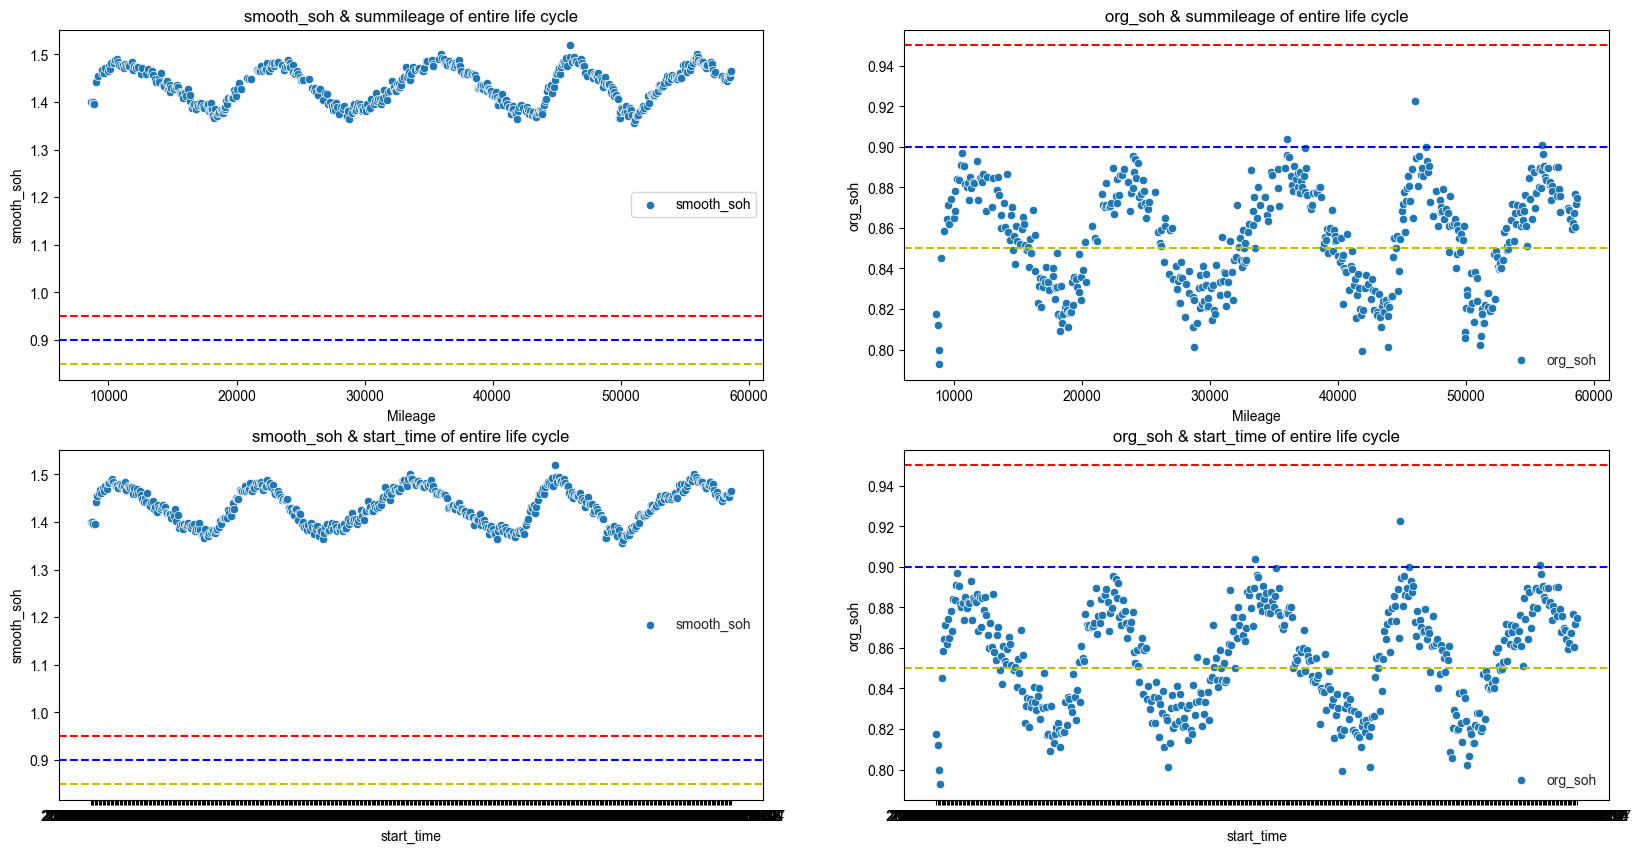

In [4]:
# 观察soh趋势
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# smooth-mileage
sns.scatterplot(data=df1, x="summileage", y="smooth_soh",label = 'smooth_soh', ax=axs[0, 0])
axs[0, 0].set_title('smooth_soh & summileage of entire life cycle')  # 设置子图的标题
axs[0, 0].set_xlabel('Mileage')  # 设置x轴标签
axs[0, 0].set_ylabel('smooth_soh')  # 设置y轴标签
axs[0, 0].axhline(y=0.95, color='r', linestyle='--', label='y=0.95')
axs[0, 0].axhline(y=0.90, color='b', linestyle='--', label='y=0.90')
axs[0, 0].axhline(y=0.85, color='y', linestyle='--', label='y=0.85')
plt.style.use('seaborn-darkgrid')  # 设置风格

# org-mileage
sns.scatterplot(data=df1, x="summileage", y="org_soh",label = 'org_soh', ax=axs[0, 1])
axs[0, 1].set_title('org_soh & summileage of entire life cycle')  # 设置子图的标题
axs[0, 1].set_xlabel('Mileage')  # 设置x轴标签
axs[0, 1].set_ylabel('org_soh')  # 设置y轴标签
axs[0, 1].axhline(y=0.95, color='r', linestyle='--', label='y=0.95')
axs[0, 1].axhline(y=0.90, color='b', linestyle='--', label='y=0.90')
axs[0, 1].axhline(y=0.85, color='y', linestyle='--', label='y=0.85')
plt.style.use('seaborn-darkgrid')  # 设置风格

# smooth-time
sns.scatterplot(data=df1, x="start_time", y="smooth_soh",label = 'smooth_soh', ax=axs[1, 0])
axs[1, 0].set_title('smooth_soh & start_time of entire life cycle')  # 设置子图的标题
axs[1, 0].set_xlabel('start_time')  # 设置x轴标签
axs[1, 0].set_ylabel('smooth_soh')  # 设置y轴标签
axs[1, 0].axhline(y=0.95, color='r', linestyle='--', label='y=0.95')
axs[1, 0].axhline(y=0.90, color='b', linestyle='--', label='y=0.90')
axs[1, 0].axhline(y=0.85, color='y', linestyle='--', label='y=0.85')
plt.style.use('seaborn-darkgrid')  # 设置风格

# org-time
sns.scatterplot(data=df1, x="start_time", y="org_soh",label = 'org_soh', ax=axs[1, 1])
axs[1, 1].set_title('org_soh & start_time of entire life cycle')  # 设置子图的标题
axs[1, 1].set_xlabel('start_time')  # 设置x轴标签
axs[1, 1].set_ylabel('org_soh')  # 设置y轴标签
axs[1, 1].axhline(y=0.95, color='r', linestyle='--', label='y=0.95')
axs[1, 1].axhline(y=0.90, color='b', linestyle='--', label='y=0.90')
axs[1, 1].axhline(y=0.85, color='y', linestyle='--', label='y=0.85')
plt.style.use('seaborn-darkgrid')  # 设置风格

In [5]:
test_data = df1[["smooth_soh", "start_time"]]
# test_data["start_time"] = test_data["start_time"].astype('datetime64')
test_data.set_index('start_time', inplace=True)

In [6]:
# 判断是否为白噪声
lags = [1, 4, 8, 16, 32]
print('序列的白噪声检验结果为：'+'\n',acorr_ljungbox(test_data['smooth_soh'], lags))

序列的白噪声检验结果为：
         lb_stat      lb_pvalue
1    455.209435  5.301670e-101
4   1737.412647   0.000000e+00
8   3209.540100   0.000000e+00
16  5048.287583   0.000000e+00
32  5585.100756   0.000000e+00


In [7]:
# 判断序列是否平稳
adf_result = adfuller(test_data["smooth_soh"])
print('ADF Statistic: %f' % adf_result[0])#ADF统计量
print('p-value: %f' % adf_result[1])#p值
print('Critical Values:')#在置信水平下的临界值
for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
print()


ADF Statistic: -4.696326
p-value: 0.000086
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570



In [8]:
decomposition = seasonal_decompose(test_data, period=120, model = 'additive')


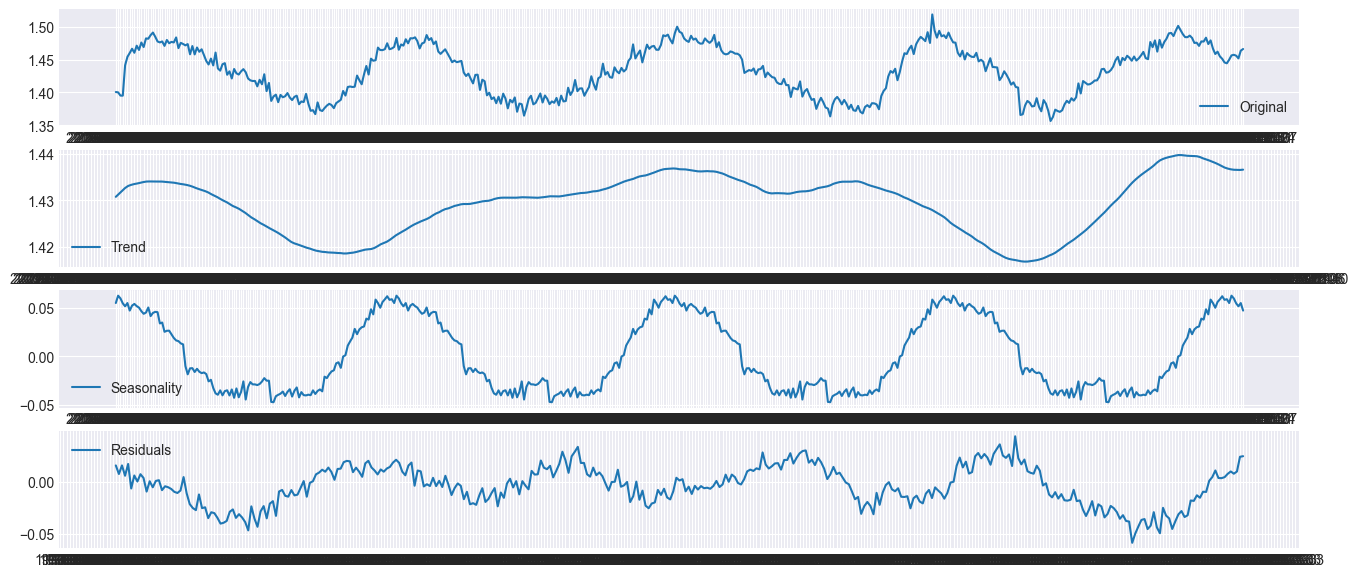

In [9]:

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
 
plt.figure(figsize=(16,7))
fig = plt.figure(1)
 
plt.subplot(411)
plt.plot(test_data, label='Original')
plt.legend(loc='best')


plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

date_format = DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()


C:\Users\18409\AppData\Local\Temp\ipykernel_2468\4199571661.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = ts_log_diff.resample('M').mean()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

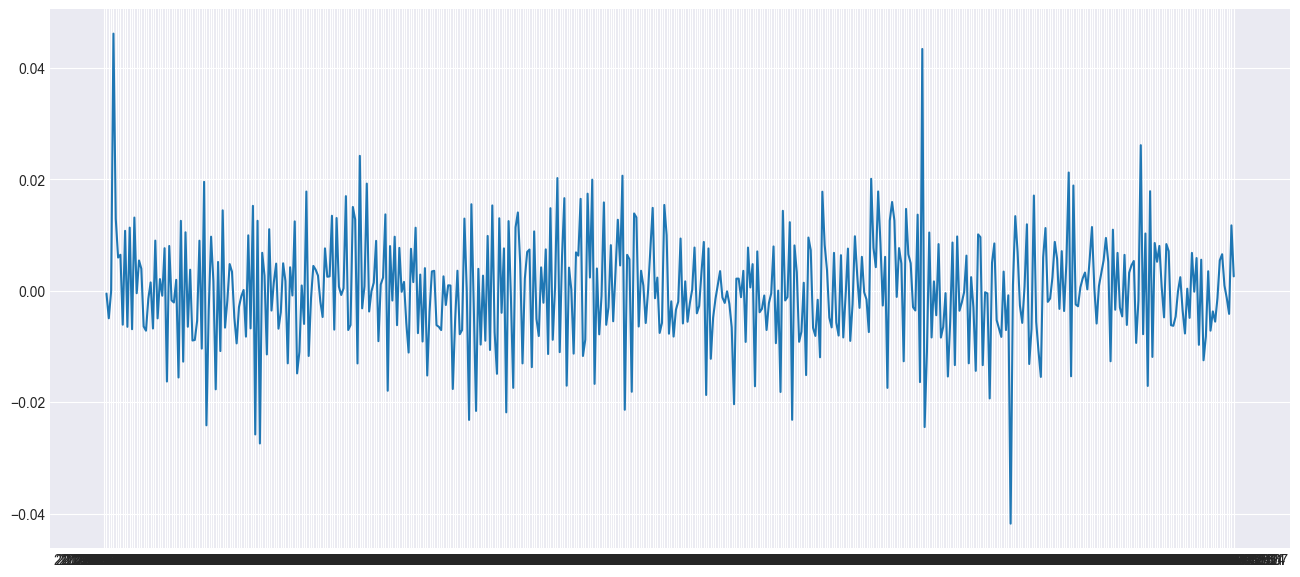

In [10]:
# differencing 对数据进行一阶差分---如果为白噪声序列，需差分，该数据集不需要，可忽略该步骤
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = test_data - test_data.shift()
plt.plot(ts_log_diff)


# 重采样到每月
df_monthly = ts_log_diff.resample('M').mean()
df_monthly_ = ts_log_diff.resample('M').std()
rolLmean = df_monthly.rolling(window=1).mean()
rolLstd = df_monthly_.rolling(window=1).std()


#Determing rolling statistics
# rolLmean = ts_log_diff.rolling('30D').mean()
# rolLstd = ts_log_diff.rolling('30D').std()
 
#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

d:\anaconda\envs\PYspark\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


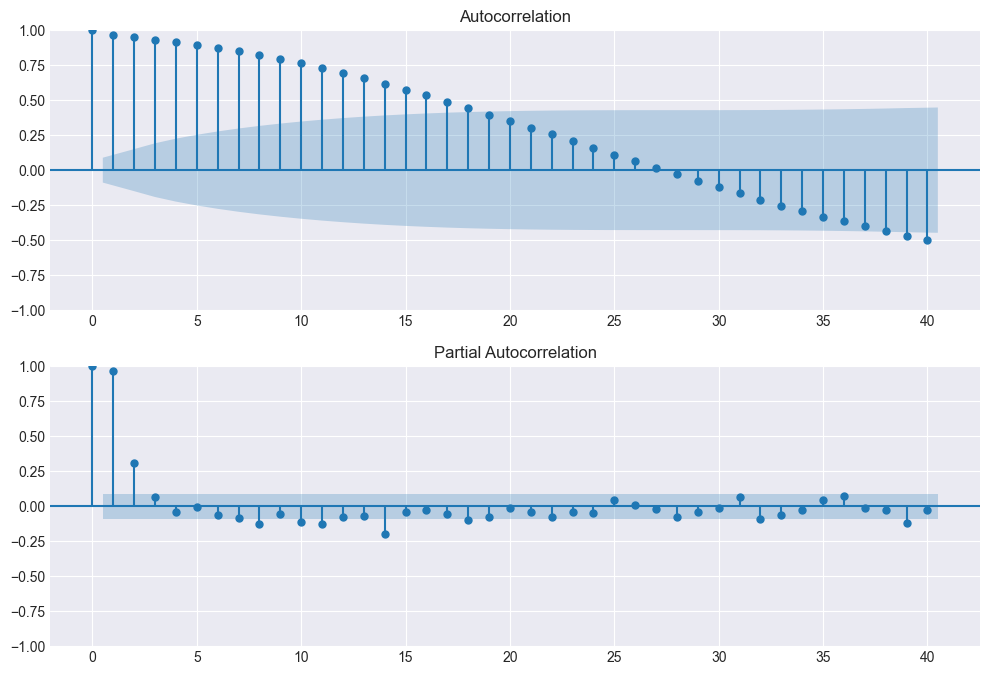

In [11]:
#计算自相关函数（ACF）和偏自相关函数（PACF）
df1.sort_index(inplace= True)

lag_acf = acf(test_data, nlags=20)
lag_pacf = pacf(test_data, nlags=20)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(test_data.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(test_data.dropna(),lags=40,ax=ax2)

In [21]:
# 切分数据集，以后十个数据作为预测值
length = len(test_data)

train_data = test_data.iloc[:-10, :]
label = test_data.iloc[-10:, :]

start_time
2019/6/15 23:07    1.431952
2019/6/19 22:00    1.401611
2019/6/20 19:15    1.400944
2019/6/21 21:58    1.397476
2019/6/23 17:09    1.395912
dtype: float64
start_time
2019/6/15 23:07    1.431952
2019/6/19 22:00    2.833563
2019/6/20 19:15    4.234507
2019/6/21 21:58    5.631983
2019/6/23 17:09    7.027895
dtype: float64


d:\anaconda\envs\PYspark\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\anaconda\envs\PYspark\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\anaconda\envs\PYspark\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RMSE: inf')

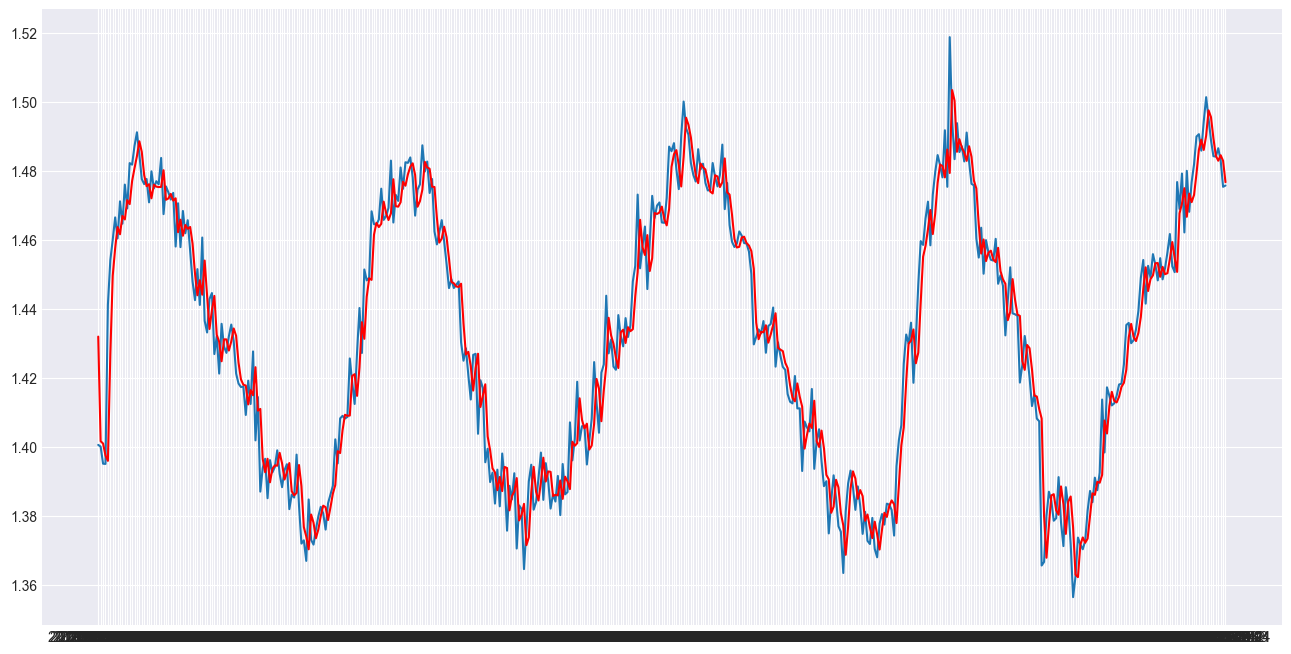

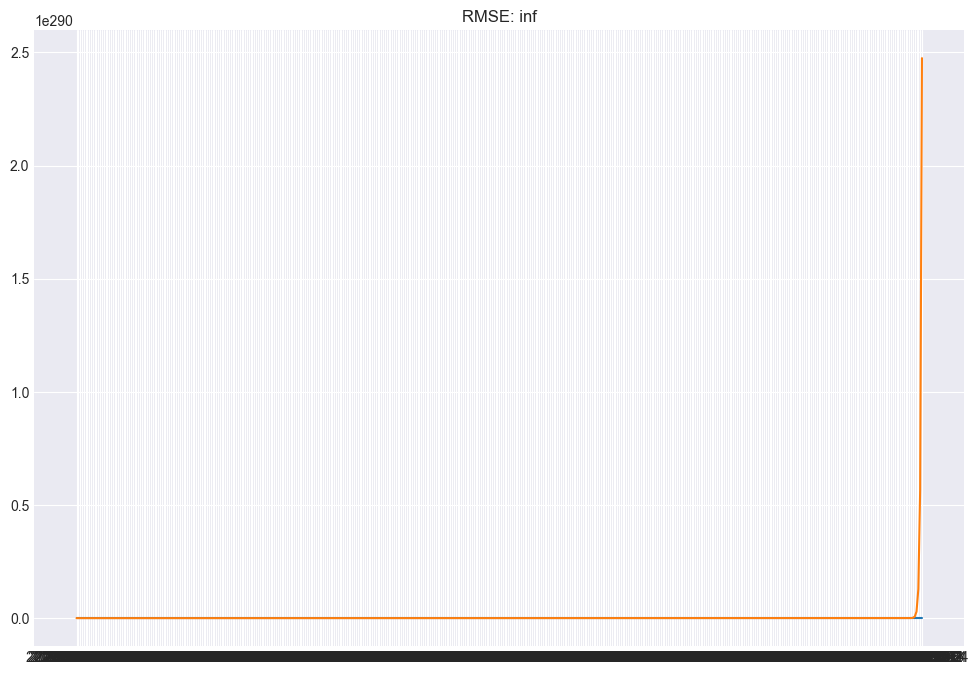

In [22]:
#建立ARIMA模型
#from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.arima.model import ARIMA
type(train_data)
#ts_log_diff.dropna()
test_data = train_data[~train_data.isnull()]
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(train_data, order=(2,0,0))  
results_ARIMA = model.fit()  
plt.plot(train_data)
plt.plot(results_ARIMA.fittedvalues, color='red')
 
#模型拟合 预测
 
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())
 
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())
 
ARIMA_log_prediction = pd.Series(train_data.iloc[0], index=train_data.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()
 
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(train_data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-train_data['smooth_soh'])**2)/len(train_data['smooth_soh'])))

d:\anaconda\envs\PYspark\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


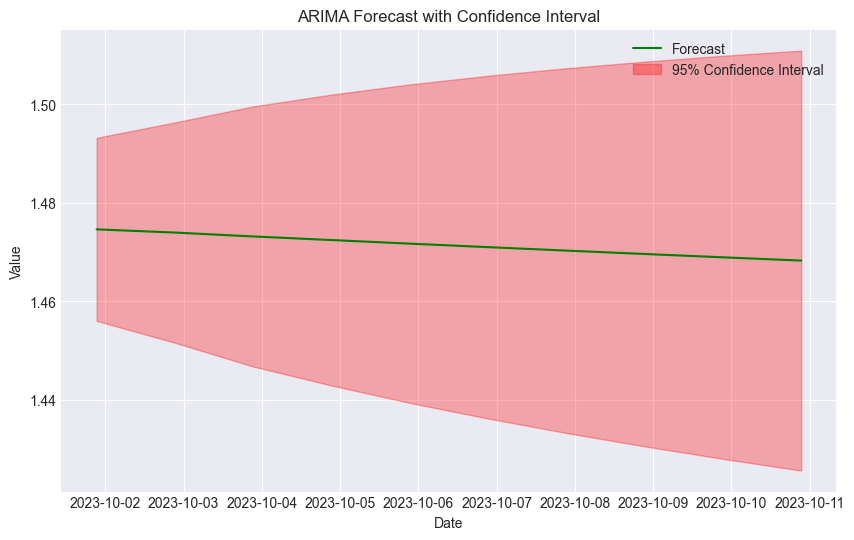

In [25]:
# 进行未来 10 步的预测
forecast_result = results_ARIMA.get_forecast(steps=10, alpha=0.05)  # 设置置信水平为 95%
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# 绘制预测结果和95%置信区间
plt.figure(figsize=(10, 6))
# plt.plot(data.index, data, label='Original Data')
plt.plot(pd.date_range(start=label.index[-1], periods=10, freq='D'), forecast, color='green', label='Forecast')
plt.fill_between(pd.date_range(start=label.index[-1], periods=10, freq='D'), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.3, label='95% Confidence Interval')
plt.title('ARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [16]:
# 检测异常值
# 先根据时间字段排序
test_data = df1[["smooth_soh", "start_time"]]
test_data = test_data.sort_values(by='start_time')

# 将时间字段转换为时间类型
test_data['start_time'] = pd.to_datetime(test_data['start_time'])

# 以时间字段为索引
test_data = test_data.set_index('start_time')

# 用 ARIMA 模型检测异常值
def detect_anomalies(series):
    model = ARIMA(series, order=(2, 0, 0))  # 选择适当的 ARIMA 参数
    results = model.fit()
    residuals = results.resid
    std_dev = residuals.std()
    anomalies = (residuals > 2 * std_dev) | (residuals < -2 * std_dev)
    return anomalies

# 对每个车辆 vin 进行异常值检测
anomalies_indices = []

anomalies = detect_anomalies(test_data['smooth_soh'])
anomalies_indices.extend(test_data[anomalies].index)

# 输出异常值的索引
print(anomalies_indices)
# print(test_data[test_data["start_time"].isin(anomalies_indices)])
# 输出异常值的索引及其对应的值
for index in anomalies_indices:
    value = test_data.loc[index, 'smooth_soh']
    print(f"Index: {index}, Value: {value}")

[Timestamp('2019-11-03 22:00:00'), Timestamp('2019-06-23 17:09:00'), Timestamp('2020-01-11 22:06:00'), Timestamp('2020-10-13 17:38:00'), Timestamp('2021-01-10 17:11:00'), Timestamp('2021-10-01 22:01:00'), Timestamp('2021-12-11 21:56:00'), Timestamp('2022-01-01 20:58:00'), Timestamp('2022-10-13 17:42:00'), Timestamp('2022-11-30 17:56:00'), Timestamp('2022-11-04 17:44:00'), Timestamp('2022-12-01 22:01:00'), Timestamp('2022-02-03 13:38:00'), Timestamp('2022-03-10 21:58:00'), Timestamp('2022-07-08 18:32:00'), Timestamp('2022-08-07 17:08:00'), Timestamp('2023-01-16 11:04:00'), Timestamp('2023-10-01 21:22:00'), Timestamp('2023-02-01 17:45:00')]
Index: 2019-11-03 22:00:00, Value: 1.430704244
Index: 2019-06-23 17:09:00, Value: 1.441187157
Index: 2020-01-11 22:06:00, Value: 1.366902172
Index: 2020-10-13 17:38:00, Value: 1.447962534
Index: 2021-01-10 17:11:00, Value: 1.375901682
Index: 2021-10-01 22:01:00, Value: 1.461264039
Index: 2021-12-11 21:56:00, Value: 1.388571843
Index: 2022-01-01 20:58:

d:\anaconda\envs\PYspark\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\anaconda\envs\PYspark\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\anaconda\envs\PYspark\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\anaconda\envs\PYspark\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\anaconda\envs\PYspark\lib\site-

In [17]:
anomalies_indices

[Timestamp('2019-11-03 22:00:00'),
 Timestamp('2019-06-23 17:09:00'),
 Timestamp('2020-01-11 22:06:00'),
 Timestamp('2020-10-13 17:38:00'),
 Timestamp('2021-01-10 17:11:00'),
 Timestamp('2021-10-01 22:01:00'),
 Timestamp('2021-12-11 21:56:00'),
 Timestamp('2022-01-01 20:58:00'),
 Timestamp('2022-10-13 17:42:00'),
 Timestamp('2022-11-30 17:56:00'),
 Timestamp('2022-11-04 17:44:00'),
 Timestamp('2022-12-01 22:01:00'),
 Timestamp('2022-02-03 13:38:00'),
 Timestamp('2022-03-10 21:58:00'),
 Timestamp('2022-07-08 18:32:00'),
 Timestamp('2022-08-07 17:08:00'),
 Timestamp('2023-01-16 11:04:00'),
 Timestamp('2023-10-01 21:22:00'),
 Timestamp('2023-02-01 17:45:00')]

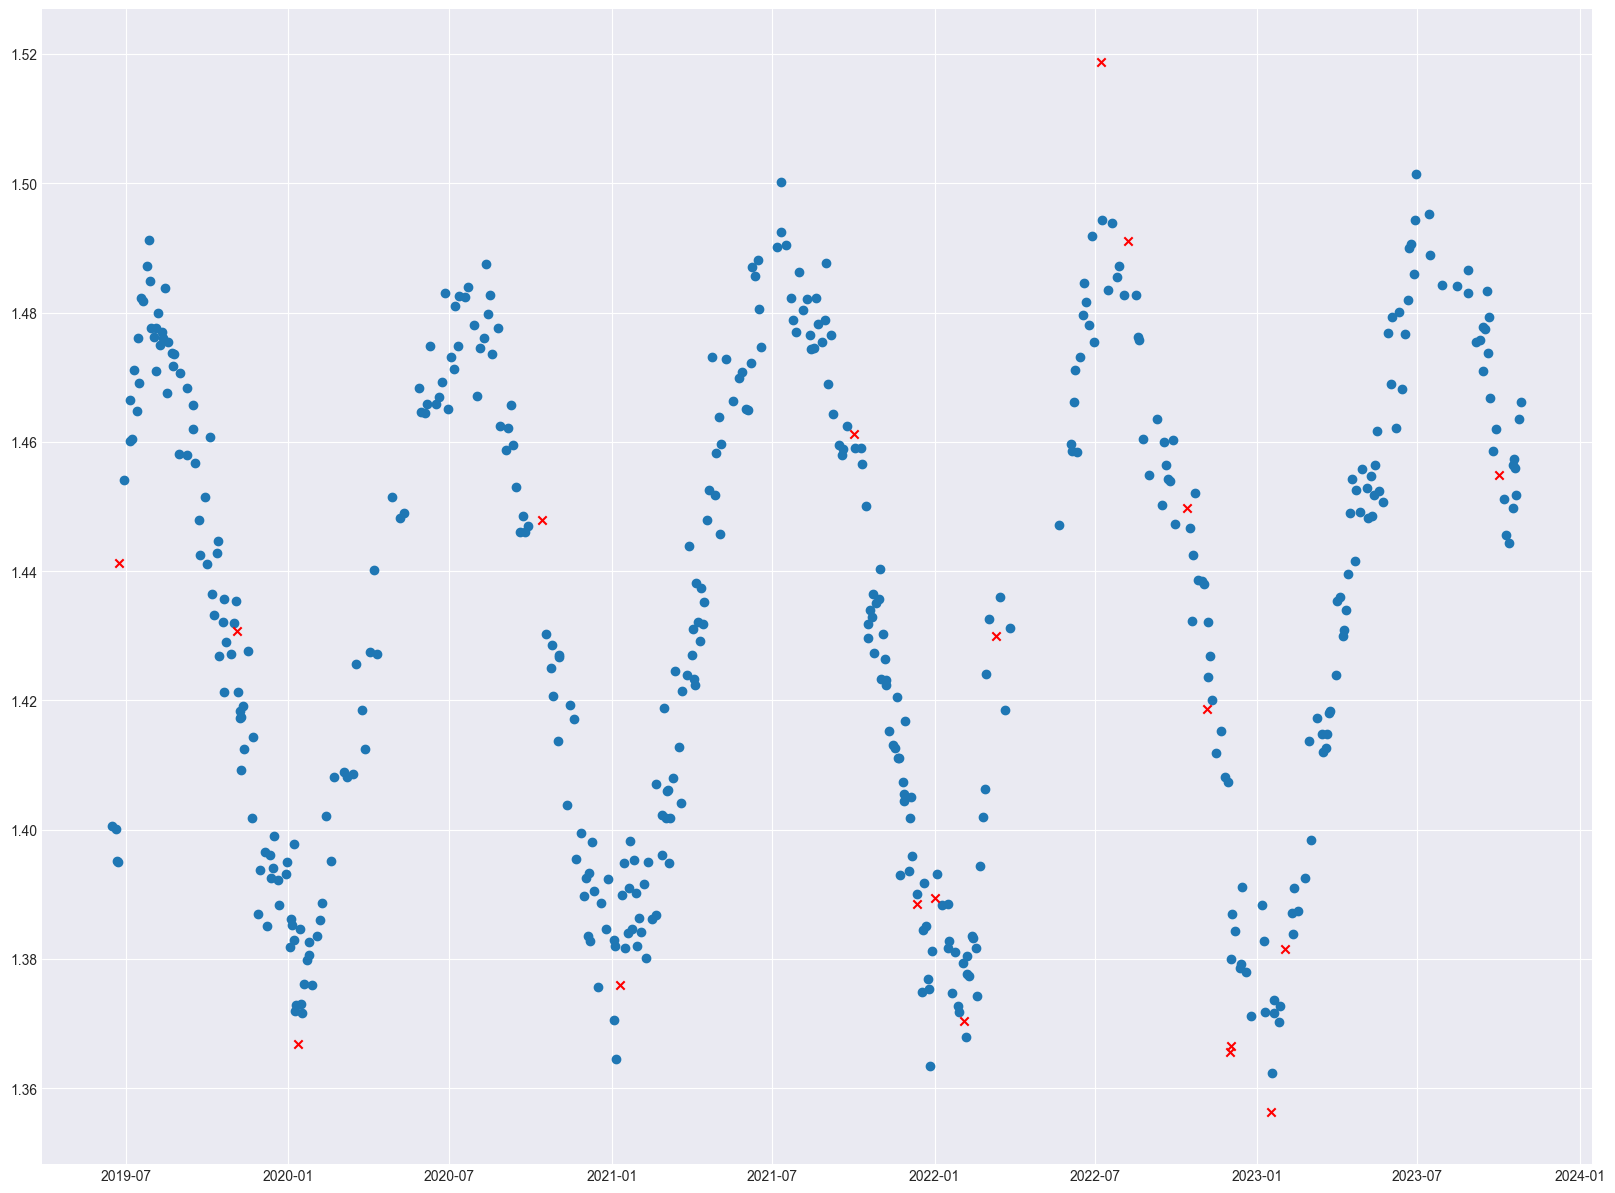

In [18]:
# 显示异常值
fig, axs = plt.subplots(figsize=(20, 15))

# 提取list中对应的index
list_vals_index = pd.to_datetime(anomalies_indices)

# 筛选出不包含异常值的数据
df_filtered = test_data[~test_data.index.isin(list_vals_index)]
plt.scatter(x=df_filtered.index, y=df_filtered['smooth_soh'], label='smooth_soh')

# 提取list中的数据并标红
plt.scatter(list_vals_index, test_data.loc[list_vals_index, 'smooth_soh'], color='red', label='Anomalies', marker='x')

In [ ]:
# time = anomalies_indices[0].dt.strstrftime('%Y-%m-%d YY:MM:DD')

In [ ]:
anomalies_indices[0]

Timestamp('2019-11-03 22:00:00')

In [ ]:
test_data.tail(10)

,smooth_soh
start_time,
2023-10-06 17:49:55,1.451179
2023-10-09 18:38:05,1.445639
2023-10-12 21:24:15,1.444368
2023-10-16 18:03:15,1.449822
2023-10-17 18:03:55,1.456377
2023-10-18 18:02:45,1.457316
2023-10-19 17:56:55,1.455993
2023-10-20 18:01:35,1.451840
2023-10-23 18:04:55,1.463578


In [ ]:
train_data = test_data[:-10]

In [ ]:
label = test_data[-10:]

In [ ]:
label["smooth_soh"]

start_time
2023-10-06 17:49:55    1.451179
2023-10-09 18:38:05    1.445639
2023-10-12 21:24:15    1.444368
2023-10-16 18:03:15    1.449822
2023-10-17 18:03:55    1.456377
2023-10-18 18:02:45    1.457316
2023-10-19 17:56:55    1.455993
2023-10-20 18:01:35    1.451840
2023-10-23 18:04:55    1.463578
2023-10-26 18:07:35    1.466158
Name: smooth_soh, dtype: float64

In [ ]:
len(test_data)

487

In [ ]:
# 选择适当的 ARIMA 参数
order = (2, 0, 0)

# 拟合 ARIMA 模型
model = ARIMA(train_data['smooth_soh'], order=order)
results = model.fit()

# 预测未来的数据
forecast_steps = 10  # 可以根据需要调整预测的步数
forecast_values = results.forecast(steps=forecast_steps)

# 输出预测值
print("ARIMA Forecast:")
print(forecast_values)

ARIMA Forecast:
477    1.456543
478    1.455451
479    1.455229
480    1.454746
481    1.454355
482    1.453945
483    1.453551
484    1.453161
485    1.452780
486    1.452406
Name: predicted_mean, dtype: float64


In [ ]:
# 评估预测性能
rmse = mean_squared_error(label['smooth_soh'], forecast_values, squared=False)
mae = mean_absolute_error(label['smooth_soh'], forecast_values)

# 输出评价指标
print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 0.00772092563140198
MAE: 0.006466798571015553


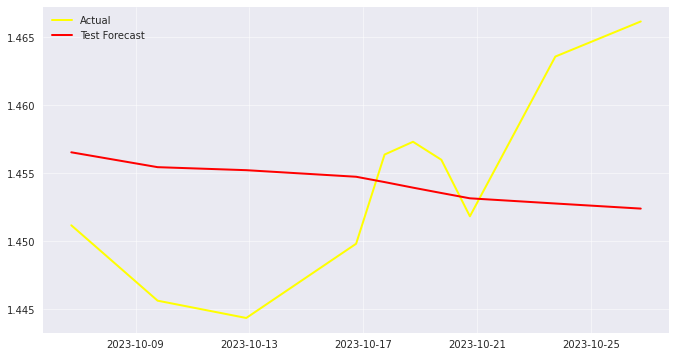

In [ ]:
plt.figure(figsize=(10, 6))
# 原始数据
# plt.plot(test_data.index, test_data['smooth_soh'], label='Actual', color='blue')

# 训练集拟合结果
# plt.plot(train_data.index, results.fittedvalues, label='Train Fitted', color='green')

# label
plt.plot(label.index, label['smooth_soh'], label='Actual', color='yellow')

# 测试集预测结果
plt.plot(label.index, forecast_values, label='Test Forecast', color='red')

plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:             smooth_soh   No. Observations:                  477
Model:                 ARIMA(2, 0, 0)   Log Likelihood                1546.682
Date:                Thu, 21 Dec 2023   AIC                          -3085.363
Time:                        16:42:50   BIC                          -3068.693
Sample:                             0   HQIC                         -3078.809
                                - 477                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4328      0.017     86.462      0.000       1.400       1.465
ar.L1          0.6684      0.039     17.263      0.000       0.593       0.744
ar.L2          0.3070      0.038      8.156      0.0

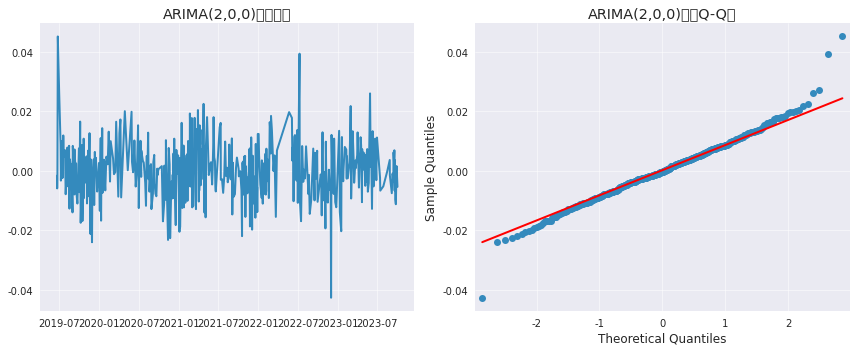

<Figure size 864x360 with 0 Axes>

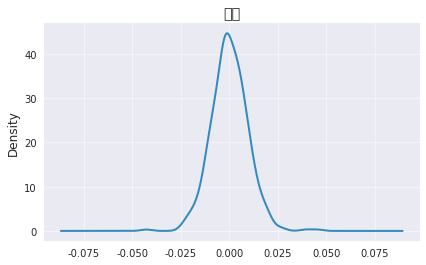

In [ ]:
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 模型检验：参数检验、显著性检验
print(results.summary())  #显示模型的所有信息

print(len(results.resid))
#print(Result.resid)这里观察到残差的第一项为原数据的1239.5，即差分数据不管第一项，这里需要调整残差的观测

#这里就可以观察到原始模型的结果LB统计量和这里的白噪声检验是一致的，p>0.05,即认为残差为白噪声序列，原序列信息提取充分。
lags = [1,4,8,16,32]
print('差分序列的白噪声检验结果为：'+'\n',acorr_ljungbox(results.resid[1:], lags))

## 查看模型的拟合残差分布
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
plt.plot(results.resid[1:])
plt.title("ARIMA(2,0,0)残差曲线")
 
## 检查残差是否符合正太分布
ax = fig.add_subplot(1,2,2)
sm.qqplot(results.resid[1:], line='q', ax=ax)
plt.title("ARIMA(2,0,0)残差Q-Q图")
plt.tight_layout()
plt.show()
 
fig = plt.figure(figsize=(12,5))
Residual=pd.DataFrame(results.resid[1:])
Residual.plot(kind='kde', title='密度')
plt.legend('')
plt.show()

In [ ]:
predict=results.predict(start=0, end=len(train_data['smooth_soh'])-1+10); #不加参数默认0到n-1，要加预测个数在end后面N-1+预测n即可
#如果是一阶差分的序列预测，第一个数据已经差分消去了，应该start从第二个观测数据开始，即n=1；如果是0阶，则不需要按默认0到n-1

print(list(zip(range(477,486),predict[-10:])))#打印预测值

[(477, 1.4565430397389818), (478, 1.455450613863692), (479, 1.455229158199369), (480, 1.4547457345202695), (481, 1.454354602331979), (482, 1.453944733268354), (483, 1.4535506746847686), (484, 1.4531614319860107), (485, 1.4527802625175192)]


In [ ]:
len(train_data)

477

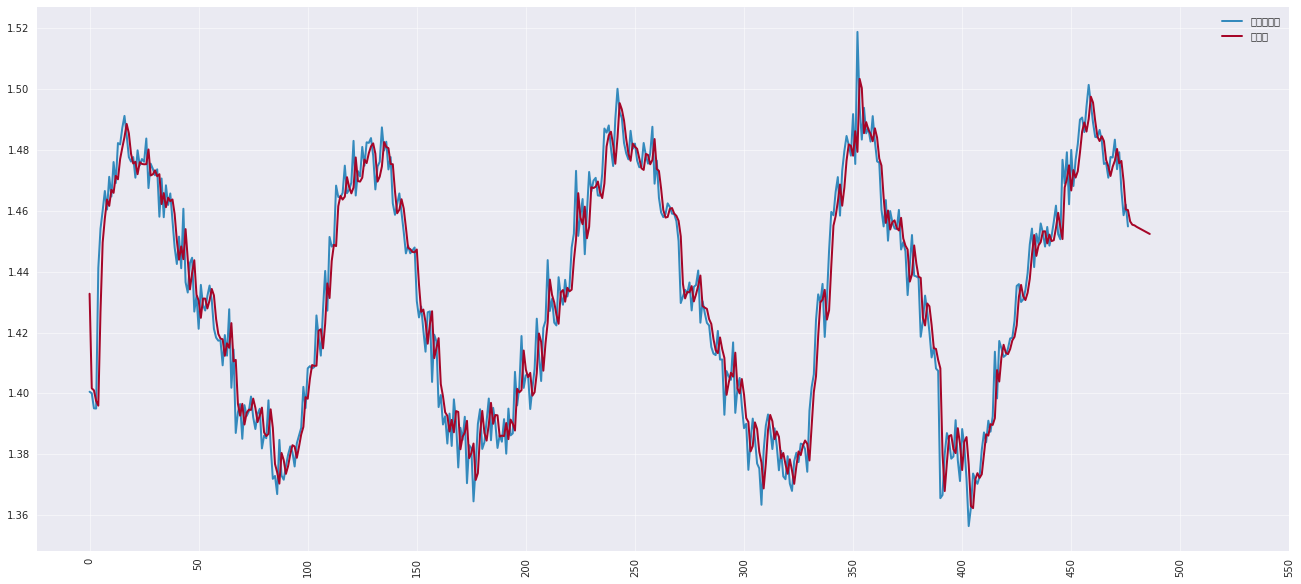

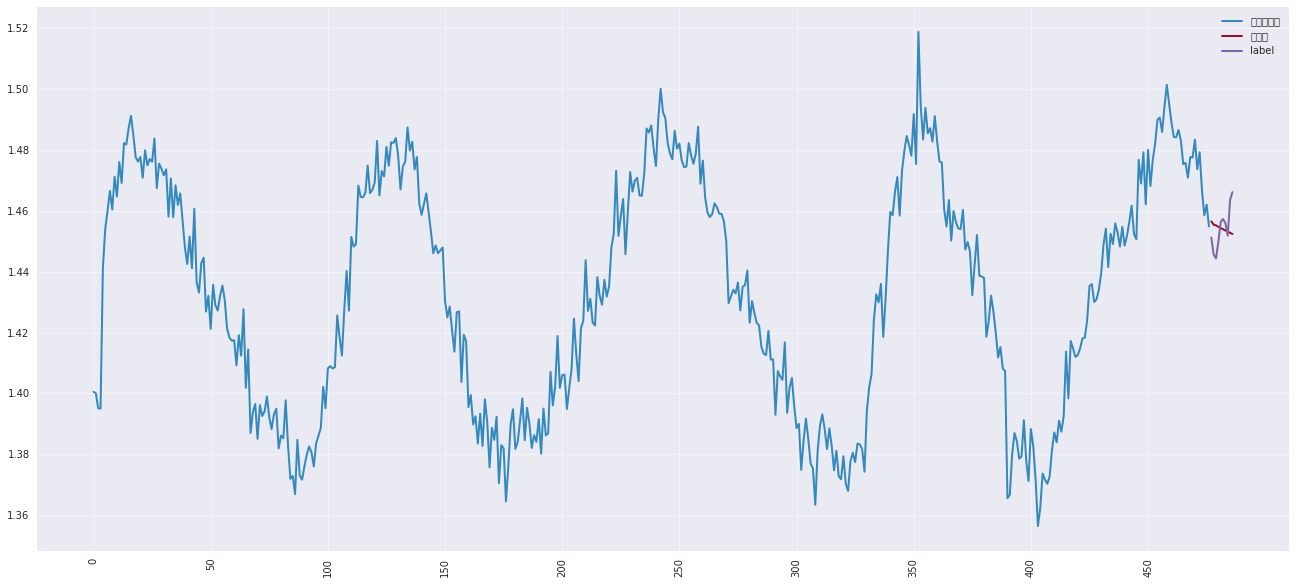

In [ ]:
# fig = plt.figure(figsize=(20, 15))


# ax = fig.add_subplot(2,1,1)
# plt.figure()
plt.figure(figsize=(20, 10))
plt.plot(range(477),train_data['smooth_soh'].values)#'o-k'
plt.plot(range(477+10),predict)#'P--'
plt.legend(('原始观测值','预测值'))
plt.xticks(list(range(0,554,50)),rotation=90)
plt.show()
 
# plt.figure()
# ax = fig.add_subplot(2,1,2)
plt.figure(figsize=(20, 10))
plt.plot(range(477),train_data['smooth_soh'].values)#'o-k'
plt.plot(range(477,477+10),predict[-10:])#'P--'#接着原数据最后一个，进行拟合预测表示
plt.plot(range(477,477+10),label)#'P--'#接着原数据最后一个，进行拟合预测表示
plt.legend(('原始观测值','预测值', 'label'))
plt.xticks(list(range(0,477,50)),rotation=90)
plt.show()


In [ ]:
print(results.aic)
print(results.bic)

-3085.363310633973
-3068.6932446704195
